# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder

## Part 1 - Data Preprocessing

### Importing the dataset

In [17]:
df = pd.read_csv('tracks.csv')

df.isnull()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
586668,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
586669,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
586670,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
df = pd.read_csv('tracks.csv')
#binning of the popularity group
df.fillna({'popularity' :0}, inplace=True)
#define bin size
bins = [0, 25, 50, 75, 100]

#names for groups
group_names = ['low', 'average', 'popular', 'very_popular']

#binning
df['popularity_rating'] = pd.cut(df['popularity'], bins, labels=group_names, include_lowest=True)
#scale_mapper = {"low":1, "average":2, "popular":3, "very_popular":4}
#df["popularity_rating_target"] = df["popularity_rating"].replace(scale_mapper)

#dataset = dataset.drop(dataset.columns[[0, 1, 5, 6, 7]], axis=1, inplace=True)
#dataset = df[df.columns.difference(['id', 'name', 'artists', 'id_artists', 'release_date'])]

df.head()



,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_rating
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,low
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,low
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,low
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,low
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,low


### Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['id', 'name', 'artists', 'id_artists', 
                                                            'release_date',
                                                            'popularity', 'popularity_rating'], 
                                                            axis=1), df['popularity_rating'],
    test_size = 0.2, random_state = 0)

# Encoding the target variable

In [5]:
# Both targets are now categorical but with multiple classes, so now we need to do one hot encoding,
# to create a feature vector. FOr example, class 1= [1,0,0,0]

# Encoding for training dataset
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

y_train = np.asarray(y_train)
y_train = y_train.reshape(-1,1)
encoder = OneHotEncoder(sparse=False)

y_train = encoder.fit_transform(y_train)

# Encoding for testing dataset
le = LabelEncoder()
le.fit(y_test)
y_test = le.transform(y_test)

y_test = np.asarray(y_test)
y_test = y_test.reshape(-1,1)
encoder = OneHotEncoder(sparse=False)

y_test = encoder.fit_transform(y_test)


### Feature Scaling

In [6]:
#normalizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [7]:
ann = tf.keras.models.Sequential()

Metal device set to: Apple M1


2022-01-02 22:49:20.935574: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-02 22:49:20.936237: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Adding the input layer and the first hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(64, input_dim=14, activation='relu')) #must use REctifier act. func (RELU)

### Adding the second hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

### Adding the output layer

In [10]:
ann.add(tf.keras.layers.Dense(units=4, activation='softmax'))

## Part 3 - Training the ANN

### Compiling the ANN

In [11]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3,172
Trainable params: 3,172
Non-trainable params: 0
_________________________________________________________________


### Training the ANN on the Training set

In [12]:
history = ann.fit(X_train, y_train, validation_split=0.2, epochs = 100)

2022-01-02 22:49:21.072749: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-01-02 22:49:21.206759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11730/11734 [============================>.] - ETA: 0s - loss: 0.8531 - accuracy: 0.6003

2022-01-02 22:50:30.182353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11734/11734 [==============================] - 81s 7ms/step - loss: 0.8531 - accuracy: 0.6003 - val_loss: 0.8391 - val_accuracy: 0.6074
Epoch 2/100
11734/11734 [==============================] - 83s 7ms/step - loss: 0.8368 - accuracy: 0.6081 - val_loss: 0.8334 - val_accuracy: 0.6082
Epoch 3/100
11734/11734 [==============================] - 84s 7ms/step - loss: 0.8324 - accuracy: 0.6102 - val_loss: 0.8313 - val_accuracy: 0.6098
Epoch 4/100
11734/11734 [==============================] - 81s 7ms/step - loss: 0.8298 - accuracy: 0.6105 - val_loss: 0.8292 - val_accuracy: 0.6099
Epoch 5/100
11734/11734 [==============================] - 78s 7ms/step - loss: 0.8282 - accuracy: 0.6112 - val_loss: 0.8290 - val_accuracy: 0.6099
Epoch 6/100
11734/11734 [==============================] - 82s 7ms/step - loss: 0.8268 - accuracy: 0.6120 - val_loss: 0.8275 - val_accuracy: 0.6111
Epoch 7/100
11734/11734 [==============================] - 78s 7ms/step - loss: 0.8258 - accuracy: 0.6126 - val_loss: 0.8289

11734/11734 [==============================] - 84s 7ms/step - loss: 0.8156 - accuracy: 0.6178 - val_loss: 0.8234 - val_accuracy: 0.6131
Epoch 57/100
11734/11734 [==============================] - 81s 7ms/step - loss: 0.8156 - accuracy: 0.6175 - val_loss: 0.8228 - val_accuracy: 0.6147
Epoch 58/100
11734/11734 [==============================] - 84s 7ms/step - loss: 0.8156 - accuracy: 0.6179 - val_loss: 0.8246 - val_accuracy: 0.6147
Epoch 59/100
11734/11734 [==============================] - 81s 7ms/step - loss: 0.8158 - accuracy: 0.6180 - val_loss: 0.8249 - val_accuracy: 0.6139
Epoch 60/100
11734/11734 [==============================] - 83s 7ms/step - loss: 0.8156 - accuracy: 0.6178 - val_loss: 0.8257 - val_accuracy: 0.6130
Epoch 61/100
11734/11734 [==============================] - 83s 7ms/step - loss: 0.8154 - accuracy: 0.6181 - val_loss: 0.8238 - val_accuracy: 0.6148
Epoch 62/100
11734/11734 [==============================] - 82s 7ms/step - loss: 0.8155 - accuracy: 0.6178 - val_loss: 

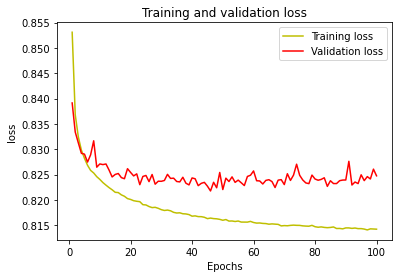

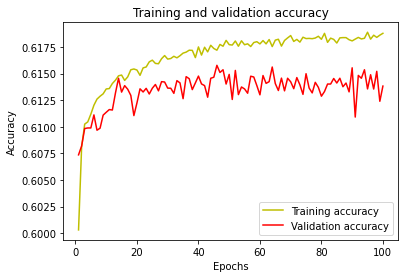

In [13]:
from matplotlib import pyplot as plt
#plot training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
predictions = ann.predict(X_test[:30])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:30])

Predicted values are:  [[4.27082300e-01 1.82763159e-01 3.75546366e-01 1.46081559e-02]
 [4.01465803e-01 1.52052656e-01 4.23730761e-01 2.27508433e-02]
 [2.77085572e-01 6.68451548e-01 5.34911789e-02 9.71800997e-04]
 [3.92420262e-01 5.43005884e-01 6.33843541e-02 1.18950300e-03]
 [3.29255521e-01 6.02731049e-01 6.75578862e-02 4.55588597e-04]
 [6.68970227e-01 1.99464813e-01 1.30183101e-01 1.38187828e-03]
 [3.39250684e-01 6.00200653e-01 5.96584417e-02 8.90221214e-04]
 [2.75027156e-01 7.06291080e-01 1.85577534e-02 1.23957943e-04]
 [3.80793005e-01 5.82690537e-01 3.62505689e-02 2.65883951e-04]
 [5.28574705e-01 2.36294404e-01 2.25050062e-01 1.00808730e-02]
 [5.56759477e-01 2.65731215e-01 1.73055753e-01 4.45358688e-03]
 [3.01715046e-01 6.27889931e-01 6.82426021e-02 2.15248996e-03]
 [5.16162038e-01 3.95795047e-01 8.70134458e-02 1.02955254e-03]
 [5.63435137e-01 3.45367193e-01 9.03511196e-02 8.46640847e-04]
 [2.79942900e-01 6.60745084e-01 5.76385446e-02 1.67351018e-03]
 [5.82584560e-01 3.77927780e-01 

2022-01-03 01:06:48.029279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [15]:
from sklearn.metrics import roc_auc_score
yhat = ann.predict(X_test)
score = roc_auc_score(y_test, yhat)
print('ROC AUC: %.3f' % score)

ROC AUC: 0.780


In [16]:
#compare with other models see which is better
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

#comparison with other models
#neural network of this code (this model)
yhat = ann.predict(X_test)
score = roc_auc_score(y_test, yhat)
print('ROC AUC: %.3f' % score)


## linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print('ROC AUC score from linear regression: ', roc_auc_lr)


## Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
roc_auc_dt = roc_auc_score(y_test, y_pred_tree)
print('/nROC AUC score from decision tree: ', roc_auc_dt)



##Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state=30)
model.fit(X_train, y_train)
y_pred_RF = model.predict(X_test)
roc_auc_RF = roc_auc_score(y_test, y_pred_RF)
print('/nROC-AUC score from Random Forest: ', roc_auc_RF)


ROC AUC: 0.780
ROC AUC score from linear regression:  0.7387387146431614
/nROC AUC score from decision tree:  0.5837322689812869
/nROC-AUC score from Random Forest:  0.6893892298056163
